## 分类问题

### BP网络实现

#### 结构一实现

Iteration 0, cost: 1.0053354170819562
Iteration 50, cost: 0.2484358141872768
Iteration 100, cost: 0.24595211214677942
Iteration 150, cost: 0.24321893019050198
Iteration 200, cost: 0.23894899271296857
Iteration 250, cost: 0.23205555836539876
Iteration 300, cost: 0.22150731211801478
Iteration 350, cost: 0.20648250242673127
Iteration 400, cost: 0.18616520242402346
Iteration 450, cost: 0.159550104970358
Iteration 500, cost: 0.12655796399257668
Iteration 550, cost: 0.089952148552431
Iteration 600, cost: 0.055434073628997535
Iteration 650, cost: 0.028995372953685372
Iteration 700, cost: 0.012926555420385937
预测结果: [[0.05644243 0.91668024 0.89521278 0.13287872]]
真实标签: [[0 1 1 0]]


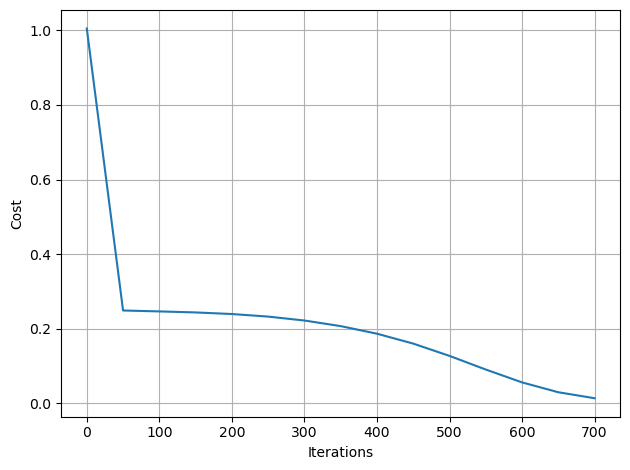

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

xor_x = np.array([[0,0], [1,0], [0,1], [1,1]])
xor_y = np.array([0, 1, 1, 0]).reshape(1, -1)

def shuffle_data(X, Y):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], Y[:, indices]

def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.5
    W2 = np.random.randn(n_y, n_h) * 0.5
    b1 = np.zeros((n_h, 1))
    b2 = np.zeros((n_y, 1))
    parameters = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return parameters

def forward_propagate(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    Z1 = np.dot(W1, X.T) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2
    cache = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}
    return A2, cache

def calculate_cost(A2, Y):
    err = A2 - Y
    cost = np.dot(err, err.T) / Y.shape[1]
    return cost

def backward_propagate(parameters, cache, X, Y):
    m = X.shape[0]
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    dZ2 = (A2 - Y)
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * sigmoid_derivative(A1)
    dW1 = np.dot(dZ1, X) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    grads = {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}
    return grads

def update_parameters(parameters, grads, learning_rate):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W1 -= learning_rate * grads['dW1']
    b1 -= learning_rate * grads['db1']
    W2 -= learning_rate * grads['dW2']
    b2 -= learning_rate * grads['db2']
    parameters = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return parameters

def train(X, Y, num_iterations, learning_rate, print_cost=False):
    n_x = X.shape[1]
    n_h = 3
    n_y = Y.shape[0]
    parameters = initialize_parameters(n_x, n_h, n_y)
    costs = []
    for i in range(num_iterations):
        X_shuffled, Y_shuffled = shuffle_data(X, Y)
        A2, cache = forward_propagate(X_shuffled, parameters)
        cost = calculate_cost(A2, Y_shuffled)
        grads = backward_propagate(parameters, cache, X_shuffled, Y_shuffled)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 50 == 0:
            print(f"Iteration {i}, cost: {cost[0][0]}")
            costs.append(cost[0][0])
        if cost < 0.01:
            break
    return parameters, costs

parameters, costs = train(xor_x, xor_y, 10000, 0.5, print_cost=True)
A2, _ = forward_propagate(xor_x, parameters)
print("预测结果:", A2)
print("真实标签:", xor_y)

plt.plot(np.arange(len(costs)) * 50, costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.tight_layout()
plt.show()


#### 结构二实现

Cost after iteration: 0, cost: 1.08110874580913
Cost after iteration: 50, cost: 0.9999972236447932
Cost after iteration: 100, cost: 0.9999944121627142
Cost after iteration: 150, cost: 0.9999907306734968
Cost after iteration: 200, cost: 0.9999854110872228
Cost after iteration: 250, cost: 0.9999770067670131
Cost after iteration: 300, cost: 0.9999624190788279
Cost after iteration: 350, cost: 0.9999339586980006
Cost after iteration: 400, cost: 0.9998682567350561
Cost after iteration: 450, cost: 0.9996669419314954
Cost after iteration: 500, cost: 0.9985354946842653
Cost after iteration: 550, cost: 0.9424998662377435
Cost after iteration: 600, cost: 0.01783209792812925
Cost after iteration: 650, cost: 3.84541778047104e-05
[[-0.99503755  0.99212455  0.99503753 -0.99503758]] [[0 1 1 0]]


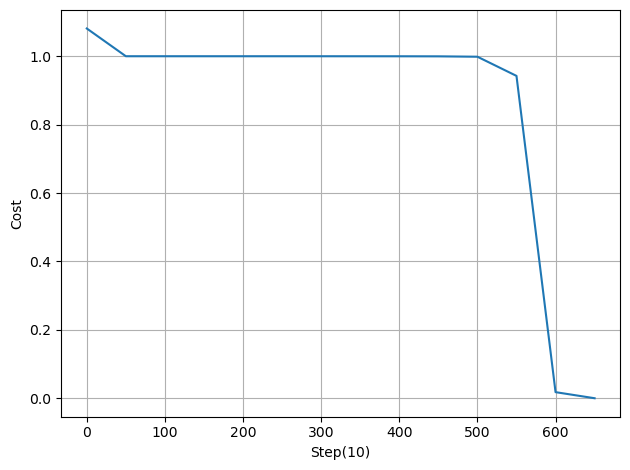

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_parameters():
    np.random.seed(2)
    parameters = {
        'w10': np.random.randn(1, 1) * 0.1,
        'w20': np.random.randn(1, 1) * 0.1,
        'w13': np.random.randn(1, 1) * 0.1,
        'w12': np.random.randn(1, 1) * 0.1,
        'w14': np.random.randn(1, 1) * 0.1,
        'w23': np.random.randn(1, 1) * 0.1,
        'w24': np.random.randn(1, 1) * 0.1
    }
    return parameters

def forward_propagate(X, parameters):
    w10, w20 = parameters['w10'], parameters['w20']
    w13, w12, w14 = parameters['w13'], parameters['w12'], parameters['w14']
    w23, w24 = parameters['w23'], parameters['w24']

    W2 = np.array([w23, w24]).reshape(2, 1)
    W1 = np.array([w13, w14]).reshape(2, 1)
    Z2 = np.dot(W2.T, X.T) - w20
    A2 = (1 - np.exp(-Z2)) / (1 + np.exp(-Z2))

    Z1 = np.dot(W1.T, X.T) + w12 * A2 - w10
    A1 = Z1

    cache = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}
    return Z1, cache

def calculate_cost(A2, Y, parameters):
    err = A2 - Y
    cost = np.dot(err, err.T) / Y.shape[1]
    return cost

def backward_propagate(parameters, cache, X, Y):
    m = X.shape[0]  # Number of samples

    w12 = parameters['w12']

    A1, A2 = cache['A1'], cache['A2']

    dZ1 = A1 - Y
    d10 = -np.sum(dZ1, axis=1, keepdims=True) / m
    d13 = np.dot(dZ1, X.T[0].T) / m
    d12 = np.dot(dZ1, A2.T) / m
    d14 = np.dot(dZ1, X.T[1].T) / m

    dZ2 = w12 * dZ1 * (1 - np.power(A2, 2))
    d23 = np.dot(dZ2, X.T[0].T) / m
    d24 = np.dot(dZ2, X.T[1].T) / m
    d20 = -np.sum(dZ2, axis=1, keepdims=True) / m

    grads = {'d10': d10, 'd20': d20, 'd13': d13, 'd12': d12, 'd14': d14, 'd23': d23, 'd24': d24}
    return grads

def update_parameters(parameters, grads, learning_rate):
    for key in parameters.keys():
        parameters[key] -= learning_rate * grads['d' + key[1:]]
    return parameters

def train(X, Y, num_iterations, learning_rate, print_cost=False):
    parameters = initialize_parameters()
    costdim = []

    for i in range(num_iterations):
        A2, cache = forward_propagate(X, parameters)
        cost = calculate_cost(A2, Y, parameters)
        grads = backward_propagate(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 50 == 0:
            print(f"Cost after iteration: {i}, cost: {cost[0][0]}")
            costdim.append(cost[0][0])

            if cost < 0.01:
                break

    return parameters, costdim

parameters, costdim = train(xor_x0, xor_y0, 1000, 0.5, True)

A2, cache = forward_propagate(xor_x0, parameters)
print(A2, xor_y)

plt.plot(np.arange(len(costdim)) * 50, costdim)
plt.xlabel("Step(10)")
plt.ylabel("Cost")
plt.grid(True)
plt.tight_layout()
plt.show()


### 三类分类问题

#### 单隐层bp网络分类

Cost after iteration 0: 3.4575033059379665
Cost after iteration 500: 2.25887488054015
Cost after iteration 1000: 1.4787827814052472
Cost after iteration 1500: 1.3076722659591566
Cost after iteration 2000: 1.2674987234278856
Cost after iteration 2500: 1.2237042659074944
Cost after iteration 3000: 1.1414899254767161
Cost after iteration 3500: 0.9718258436057811
Cost after iteration 4000: 0.7239126084717658
Cost after iteration 4500: 0.5607186999757787
Cost after iteration 5000: 0.5015739756798159
Cost after iteration 5500: 0.47903287226403435
Cost after iteration 6000: 0.46829681268781864
Cost after iteration 6500: 0.46253109740219805
Cost after iteration 7000: 0.4592705014578297
Cost after iteration 7500: 0.45731065664864623
Cost after iteration 8000: 0.45600794028462815
Cost after iteration 8500: 0.45503947009576173
Cost after iteration 9000: 0.45425452640052844
Cost after iteration 9500: 0.45358358102040824
[0, 0, 1, 0, 0, 0, 0, 0, 0] 1


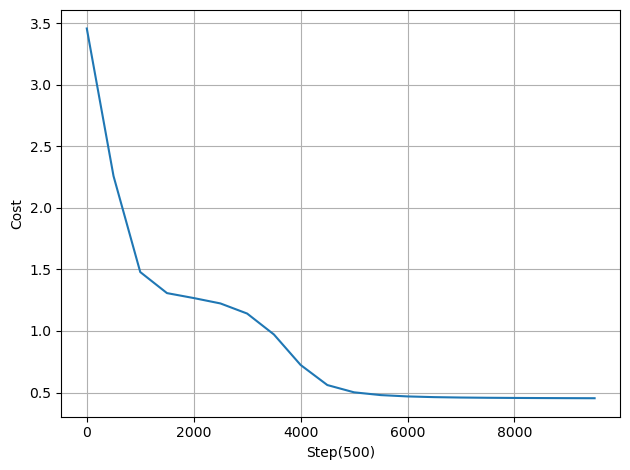

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([[0.25, 0.25], [0.75, 0.125], [0.25, 0.75],
                   [0.5, 0.125], [0.75, 0.25], [0.25, 0.75],
                   [0.25, 0.5], [0.5, 0.5], [0.75, 0.5]])
y_data = np.array([[1, -1, -1], [1, -1, -1], [1, -1, -1],
                   [-1, 1, -1], [-1, 1, -1], [-1, 1, -1],
                   [-1, -1, 1], [-1, -1, 1], [-1, -1, 1]]).T

def shuffle_data(X, Y):
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    return X[idx], Y[:, idx]

def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.5
    W2 = np.random.randn(n_y, n_h) * 0.5
    b1 = np.zeros((n_h, 1))
    b2 = np.zeros((n_y, 1))
    return {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

def forward_propagate(X, parameters):
    W1, b1, W2, b2 = parameters['W1'], parameters['b1'], parameters['W2'], parameters['b2']
    Z1 = np.dot(W1, X.T) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    Z2 = np.dot(W2, A1) + b2
    A2 = Z2
    return A2, {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}

def calculate_cost(A2, Y):
    err = A2 - Y
    cost = np.mean(np.sum(err**2, axis=0))
    return cost

def backward_propagate(parameters, cache, X, Y):
    m = X.shape[0]
    W1, W2 = parameters['W1'], parameters['W2']
    A1, A2 = cache['A1'], cache['A2']
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * (A1 * (1 - A1))
    dW1 = np.dot(dZ1, X) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}

def update_parameters(parameters, grads, learning_rate):
    parameters['W1'] -= learning_rate * grads['dW1']
    parameters['b1'] -= learning_rate * grads['db1']
    parameters['W2'] -= learning_rate * grads['dW2']
    parameters['b2'] -= learning_rate * grads['db2']
    return parameters

def train(X, Y, num_iterations, learning_rate, print_cost=False):
    n_x, n_h, n_y = 2, 5, 3
    parameters = initialize_parameters(n_x, n_h, n_y)
    X_shuffled, Y_shuffled = shuffle_data(X, Y)
    cost_list = []

    for i in range(num_iterations):
        A2, cache = forward_propagate(X_shuffled, parameters)
        cost = calculate_cost(A2, Y_shuffled)
        grads = backward_propagate(parameters, cache, X_shuffled, Y_shuffled)
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 500 == 0:
            print(f'Cost after iteration {i}: {cost}')
            cost_list.append(cost)
            if cost < 0.1:
                break

    return parameters, cost_list

parameters, cost_list = train(x_data, y_data, 10000, 0.5, True)

A2, cache = forward_propagate(x_data, parameters)
A2_binary = np.where(A2 >= 0, 1, -1)
res = [1 if not np.array_equal(a2, y) else 0 for a2, y in zip(A2_binary.T, y_data.T)]
print(res, sum(res))

plt.plot(np.arange(len(cost_list)) * 500, cost_list)
plt.xlabel("Step(500)")
plt.ylabel("Cost")
plt.grid(True)
plt.tight_layout()
plt.show()


#### RBF网络进行分类

Cost after iteration 0: 3.2128879643355086
Cost after iteration 500: 1.8002583000081178
Cost after iteration 1000: 1.793033916126218
Cost after iteration 1500: 1.7863892688269978
Cost after iteration 2000: 1.780277568463259
Cost after iteration 2500: 1.7746560689832207
Cost after iteration 3000: 1.7694854528660504
Cost after iteration 3500: 1.7647295561295873
Cost after iteration 4000: 1.7603551153946064
Cost after iteration 4500: 1.756331535236284
Cost after iteration 5000: 1.752630674195698
Cost after iteration 5500: 1.7492266479546903
Cost after iteration 6000: 1.7460956482974763
Cost after iteration 6500: 1.7432157765927943
Cost after iteration 7000: 1.7405668906319427
Cost after iteration 7500: 1.7381304637514698
Cost after iteration 8000: 1.7358894552552109
Cost after iteration 8500: 1.7338281912293727
Cost after iteration 9000: 1.731932254917079
Cost after iteration 9500: 1.7301883858856428
分类误差情况: [0, 1, 1, 0, 1, 1, 0, 0, 1]
总误差数量: 5


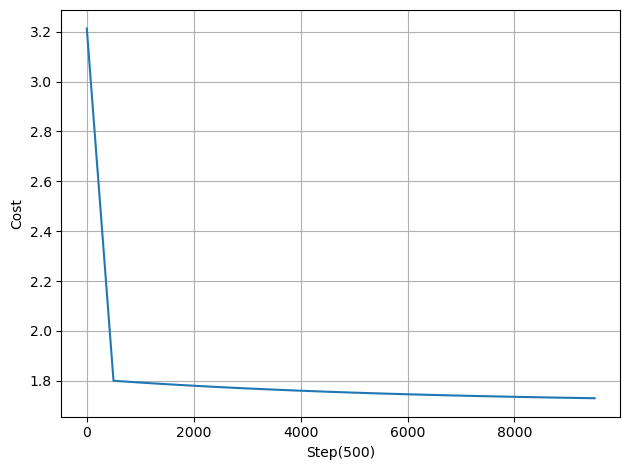

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.array([[0.25, 0.25], [0.75, 0.125], [0.25, 0.75],
                   [0.5, 0.125], [0.75, 0.25], [0.25, 0.75],
                   [0.25, 0.5], [0.5, 0.5], [0.75, 0.5]])
y_data = np.array([[1, -1, -1], [1, -1, -1], [1, -1, -1],
                   [-1, 1, -1], [-1, 1, -1], [-1, 1, -1],
                   [-1, -1, 1], [-1, -1, 1], [-1, -1, 1]]).T

def euclidean_distance(X, centers):
    return np.sqrt(((X - centers[:, np.newaxis]) ** 2).sum(axis=2))

def gaussian_rbf(distances, sigma):
    return np.exp(-(distances ** 2) / (2 * sigma ** 2))

def initialize_rbf_parameters(n_hidden, n_x):
    np.random.seed(2)
    centers = np.random.uniform(0, 1, (n_hidden, n_x))
    sigma = 0.1
    W = np.random.randn(3, n_hidden) * 0.5
    return centers, sigma, W

def forward_rbf(X, centers, sigma, W):
    distances = euclidean_distance(X, centers)
    A_hidden = gaussian_rbf(distances, sigma)
    A_output = np.dot(W, A_hidden)
    return A_output, A_hidden

def calculate_rbf_cost(A_output, Y):
    err = A_output - Y
    cost = np.mean(np.sum(err**2, axis=0))
    return cost

def backward_rbf(A_hidden, A_output, Y):
    m = A_hidden.shape[1]
    dW = np.dot((A_output - Y), A_hidden.T) / m
    return dW

def update_rbf_parameters(W, dW, learning_rate):
    W -= learning_rate * dW
    return W

def train_rbf(X, Y, n_hidden, num_iterations, learning_rate, print_cost=False):
    centers, sigma, W = initialize_rbf_parameters(n_hidden, X.shape[1])
    cost_list = []

    for i in range(num_iterations):
        A_output, A_hidden = forward_rbf(X, centers, sigma, W)
        cost = calculate_rbf_cost(A_output, Y)
        dW = backward_rbf(A_hidden, A_output, Y)
        W = update_rbf_parameters(W, dW, learning_rate)

        if print_cost and i % 500 == 0:
            print(f'Cost after iteration {i}: {cost}')
            cost_list.append(cost)
            if cost < 0.1:
                break

    return centers, sigma, W, cost_list

n_hidden = 5
centers, sigma, W, cost_dim9 = train_rbf(x_data, y_data, n_hidden, 10000, 0.5, True)

A_output, _ = forward_rbf(x_data, centers, sigma, W)
A_output_binary = np.where(A_output >= 0, 1, -1)

res = [1 if not np.array_equal(a2, y) else 0 for a2, y in zip(A_output_binary.T, y_data.T)]
print("分类误差情况:", res)
print("总误差数量:", sum(res))

plt.plot(np.arange(len(cost_dim9)) * 500, cost_dim9)
plt.xlabel("Step(500)")
plt.ylabel("Cost")
plt.grid(True)
plt.tight_layout()
plt.show()


#### 训练数据扩充
选用rbf网络 通过将训练数据扩充到180 比较训练效果

Training with 9 samples...
Iteration 0, Cost: 4.04528065281554
Iteration 500, Cost: 1.615716207680773
Iteration 1000, Cost: 1.5798688683998214
Iteration 1500, Cost: 1.558029370452501
Iteration 2000, Cost: 1.5444175424790683
Iteration 2500, Cost: 1.53593344065094
Iteration 3000, Cost: 1.5306453935191993
Iteration 3500, Cost: 1.5273494120427324
Iteration 4000, Cost: 1.5252950631266642
Iteration 4500, Cost: 1.5240146100964862
Iteration 5000, Cost: 1.5232165178397774
Iteration 5500, Cost: 1.522719075735142
Iteration 6000, Cost: 1.522409025555625
Iteration 6500, Cost: 1.5222157746970366
Iteration 7000, Cost: 1.5220953235674703
Iteration 7500, Cost: 1.5220202477063856
Iteration 8000, Cost: 1.521973453749884
Iteration 8500, Cost: 1.5219442875926994
Iteration 9000, Cost: 1.5219261086484834
Iteration 9500, Cost: 1.5219147779129765
Training with 180 samples...
Iteration 0, Cost: 4.060056882906953
Iteration 500, Cost: 1.6215303229594462
Iteration 1000, Cost: 1.5987184762269755
Iteration 1500, Cos

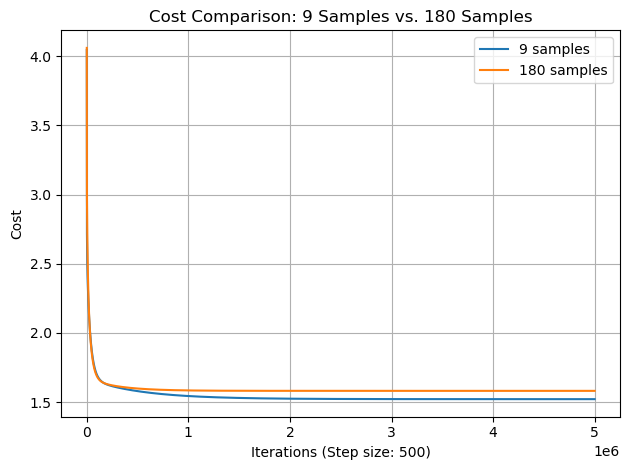

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

x_data = np.array([[0.25, 0.25], [0.75, 0.125], [0.25, 0.75],
                   [0.5, 0.125], [0.75, 0.25], [0.25, 0.75],
                   [0.25, 0.5], [0.5, 0.5], [0.75, 0.5]])

y_data = np.array([[1, -1, -1], [1, -1, -1], [1, -1, -1],
                   [-1, 1, -1], [-1, 1, -1], [-1, 1, -1],
                   [-1, -1, 1], [-1, -1, 1], [-1, -1, 1]]).T

def add_noise_to_data(X, Y, num_augmented):
    X_augmented = []
    Y_augmented = []
    for i in range(num_augmented):
        noise = np.random.normal(0, 0.05, X.shape)
        X_augmented.append(X + noise)
        Y_augmented.append(Y)
    X_augmented = np.vstack(X_augmented)
    Y_augmented = np.hstack(Y_augmented)
    return X_augmented, Y_augmented

def rbf(X, centers, sigma):
    return np.exp(-cdist(X, centers)**2 / (2 * sigma**2))

def initialize_rbf(X, num_centers):
    kmeans = KMeans(n_clusters=num_centers, random_state=0).fit(X)
    centers = kmeans.cluster_centers_
    sigma = np.mean([np.linalg.norm(c1 - c2) for c1 in centers for c2 in centers])
    return centers, sigma

def forward_propagate(X, centers, sigma, weights):
    RBF_output = rbf(X, centers, sigma)
    return np.dot(RBF_output, weights)

def calculate_cost(predictions, Y):
    err = predictions - Y
    return np.mean(np.sum(err**2, axis=0))

def train_rbf(X, Y, num_centers, num_iterations, learning_rate):
    centers, sigma = initialize_rbf(X, num_centers)
    weights = np.random.randn(num_centers, Y.shape[0]) * 0.5
    cost_history = []

    for i in range(num_iterations):
        predictions = forward_propagate(X, centers, sigma, weights)
        cost = calculate_cost(predictions.T, Y)
        cost_history.append(cost)

        RBF_output = rbf(X, centers, sigma)
        error = predictions - Y.T
        grad = np.dot(RBF_output.T, error) / X.shape[0]
        weights -= learning_rate * grad

        if i % 500 == 0:
            print(f"Iteration {i}, Cost: {cost}")

    return weights, centers, sigma, cost_history

print("Training with 9 samples...")
weights_9, centers_9, sigma_9, costdim_9 = train_rbf(x_data, y_data, num_centers=5, num_iterations=10000, learning_rate=0.5)

x_data_augmented, y_data_augmented = add_noise_to_data(x_data, y_data, num_augmented=20)
print("Training with 180 samples...")
weights_180, centers_180, sigma_180, costdim_180 = train_rbf(x_data_augmented, y_data_augmented, num_centers=5, num_iterations=10000, learning_rate=0.5)

plt.plot(np.arange(len(costdim_9)) * 500, costdim_9, label='9 samples')
plt.plot(np.arange(len(costdim_180)) * 500, costdim_180, label='180 samples')

plt.xlabel("Iterations (Step size: 500)")
plt.ylabel("Cost")
plt.title("Cost Comparison: 9 Samples vs. 180 Samples")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### MNIST分类

#### 数据集下载并导入

In [9]:
from torchvision import datasets, transforms

train_dataset = datasets.MNIST('./data', train=True, 
                                transform=transforms.ToTensor(), 
                                download=True)
test_dataset =  datasets.MNIST('./data', train=False, 
                                transform=transforms.ToTensor(),
                                download=True)


In [25]:
import os
from skimage import io
import torchvision.datasets.mnist as mnist

root="data/MNIST/raw"
train_set = (
    mnist.read_image_file(os.path.join(root, 'train-images-idx3-ubyte')),
    mnist.read_label_file(os.path.join(root, 'train-labels-idx1-ubyte'))
        )
test_set = (
    mnist.read_image_file(os.path.join(root, 't10k-images-idx3-ubyte')),
    mnist.read_label_file(os.path.join(root, 't10k-labels-idx1-ubyte'))
        )
print("training set :",train_set[0].size())
print("test set :",test_set[0].size())

def convert_to_img(train=True):
    if(train):
        f=open(root+'train.txt','w')
        data_path=root+'/train/'
        if(not os.path.exists(data_path)):
            os.makedirs(data_path)
        for i, (img,label) in enumerate(zip(train_set[0],train_set[1])):
            img_path=data_path+str(i)+'.jpg'
            io.imsave(img_path,img.numpy())
            f.write(img_path+' '+str(label)+'\n')
        f.close()
    else:
        f = open(root + 'test.txt', 'w')
        data_path = root + '/test/'
        if (not os.path.exists(data_path)):
            os.makedirs(data_path)
        for i, (img,label) in enumerate(zip(test_set[0],test_set[1])):
            img_path = data_path+ str(i) + '.jpg'
            io.imsave(img_path, img.numpy())
            f.write(img_path + ' ' + str(label) + '\n')
        f.close()

convert_to_img(True)#转换训练集
convert_to_img(False)#转换测试集


training set : torch.Size([60000, 28, 28])
test set : torch.Size([10000, 28, 28])


部分数据集展示

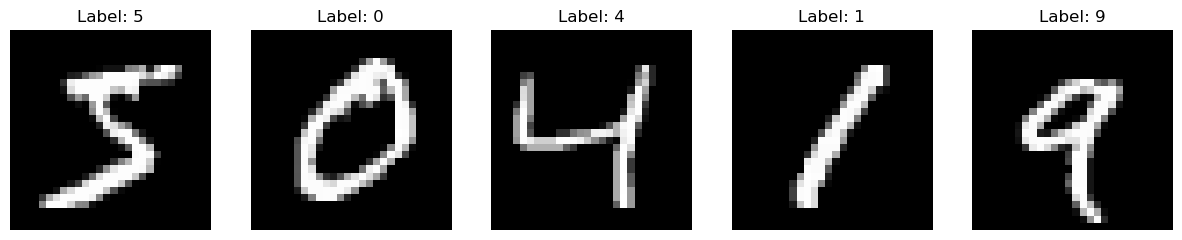

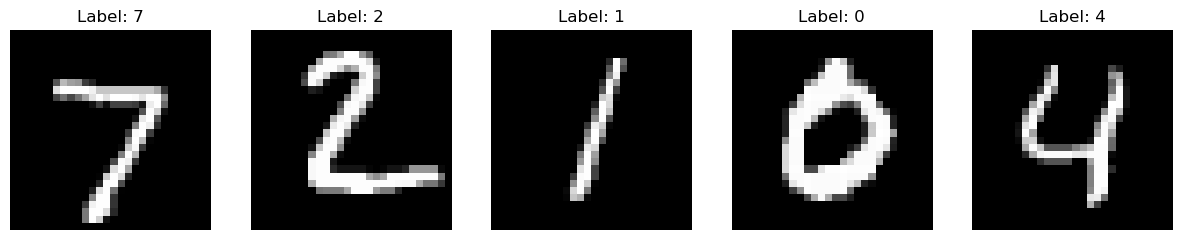

In [26]:
# 展示部分训练集数据
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(train_set[0][i].numpy(), cmap='gray')
    ax.set_title(f"Label: {train_set[1][i].item()}")
    ax.axis('off')
plt.show()

# 展示部分测试集数据
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(test_set[0][i].numpy(), cmap='gray')
    ax.set_title(f"Label: {test_set[1][i].item()}")
    ax.axis('off')
plt.show()

##### 直接图片输入法

Epoch [1/10], Loss: 0.3420
Epoch [2/10], Loss: 0.1535
Epoch [3/10], Loss: 0.1110
Epoch [4/10], Loss: 0.0923
Epoch [5/10], Loss: 0.0751
Epoch [6/10], Loss: 0.0650
Epoch [7/10], Loss: 0.0578
Epoch [8/10], Loss: 0.0541
Epoch [9/10], Loss: 0.0468
Epoch [10/10], Loss: 0.0415


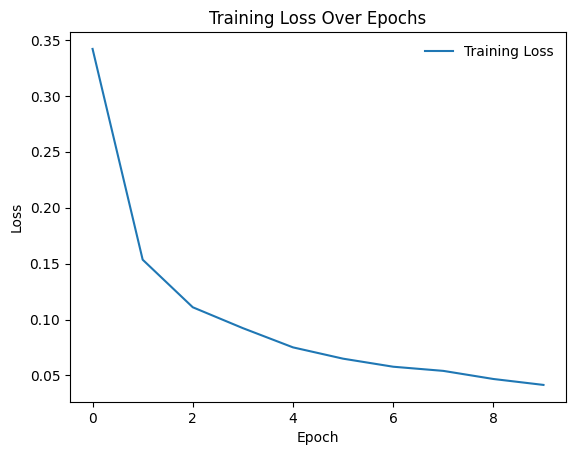

Test Accuracy: 97.49%


In [7]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

class BPNetwork(nn.Module):
    def __init__(self):
        super(BPNetwork, self).__init__()
        self.fc1 = nn.Linear(784, 256)  # 隐藏层1，256个节点
        self.fc2 = nn.Linear(256, 128)  # 隐藏层2，128个节点
        self.fc3 = nn.Linear(128, 10)   # 输出层，10个节点
        self.relu = nn.ReLU()  # 激活函数

    def forward(self, x):
        x = x.view(-1, 28*28)  
        x = self.relu(self.fc1(x))  # 隐藏层1
        x = self.relu(self.fc2(x))  # 隐藏层2
        x = self.fc3(x)  # 输出层
        return x

model = BPNetwork()

criterion = nn.CrossEntropyLoss()  # 损失函数
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam优化器


epochs = 10  # 训练轮数
train_losses = []

for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()  # 梯度清零
        outputs = model(images)  # 前向传播
        loss = criterion(outputs, labels)  # 计算损失
        loss.backward()  # 反向传播
        optimizer.step()  # 参数更新

        running_loss += loss.item()
    
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}")

plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(frameon=False)
plt.show()

correct = 0
total = 0

with torch.no_grad():  # 测试时不需要计算梯度
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)  # 获取预测值
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')


##### 人工特征提取法

Epoch [1/10], Loss: 0.5907
Epoch [2/10], Loss: 0.2116
Epoch [3/10], Loss: 0.1248
Epoch [4/10], Loss: 0.0781
Epoch [5/10], Loss: 0.0617
Epoch [6/10], Loss: 0.0590
Epoch [7/10], Loss: 0.0522
Epoch [8/10], Loss: 0.0582
Epoch [9/10], Loss: 0.0409
Epoch [10/10], Loss: 0.0407


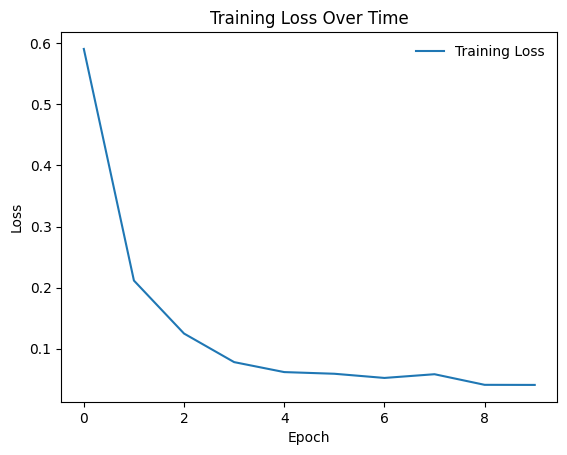

Test Accuracy: 91.20%


In [10]:
import torch
from torchvision import datasets, transforms
import numpy as np
import cv2
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

mnist_train = datasets.MNIST(root='./data', train=True, download=True)
mnist_test = datasets.MNIST(root='./data', train=False, download=True)

train_data = mnist_train.data[:5000].numpy()
train_labels = mnist_train.targets[:5000].numpy()
test_data = mnist_test.data[:2000].numpy()
test_labels = mnist_test.targets[:2000].numpy()

def downsample(image, size=(14, 14)):
    return cv2.resize(image, size, interpolation=cv2.INTER_LINEAR)

def extract_edge_orientation(image):
    edges = cv2.Canny(image, 100, 200)
    sobelx = cv2.Sobel(np.float32(image), cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(np.float32(image), cv2.CV_64F, 0, 1, ksize=5)
    orientation = np.arctan2(sobely, sobelx)
    return orientation

def extract_features(data):
    features = []
    for img in data:
        downsampled_img = downsample(img)
        orientation_img = extract_edge_orientation(img)
        features.append(np.concatenate((downsampled_img.flatten(), orientation_img.flatten())))
    return np.array(features)

train_features = extract_features(train_data)
test_features = extract_features(test_data)

train_features = torch.tensor(train_features, dtype=torch.float32)
train_labels = torch.tensor(train_labels, dtype=torch.long)
test_features = torch.tensor(test_features, dtype=torch.float32)
test_labels = torch.tensor(test_labels, dtype=torch.long)

# 2. 模型设计
class SmallBPNet(nn.Module):
    def __init__(self):
        super(SmallBPNet, self).__init__()
        self.fc1 = nn.Linear(14*14 + 28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SmallBPNet()

# 3. 设置损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. 训练模型
epochs = 10
batch_size = 64
train_losses = []

for epoch in range(epochs):
    running_loss = 0.0
    for i in range(0, len(train_features), batch_size):
        inputs = train_features[i:i+batch_size]
        labels = train_labels[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    epoch_loss = running_loss / (len(train_features) // batch_size)
    train_losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}")

plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(frameon=False)
plt.show()

correct = 0
total = 0

with torch.no_grad():
    for i in range(0, len(test_features), batch_size):
        inputs = test_features[i:i+batch_size]
        labels = test_labels[i:i+batch_size]
        
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

**人工提取特征法**
* 优点：可以通过提取边缘方向和降采样减少输入维度，进而减少计算开销；通过人工设计特征可以增强对模型的可解释性；高特征性可以减少不必要的冗余信息，可能更适合小规模的数据集。
* 缺点：特征提取过于依赖人的经验，可能需要特定特征进行表征；降采样和边缘提取等方法可能导致原始图像中有用信息的丢失；对于自然图像分类或对象检测等任务，往往需要更深层次的特征表示，手工提取特征可能无法很好完成。

**直接图像输入法**
* 优点：其不需要手动设计特征，可以更适应广泛问题，尤其复杂的图像任务；直接的原始像素输入可以保留图像中的所有细节信息。
* 缺点：输入维度较高，对于使用深层神经网络情况下，训练时间和计算资源需求更大；对于较小的数据集，直接使用高维数据可能会导致过拟合。


#### FashionMNIST

In [8]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# 数据集预处理：标准化
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# 加载训练集和测试集
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)



Epoch [1/10], Loss: 0.4829
Epoch [2/10], Loss: 0.3650
Epoch [3/10], Loss: 0.3258
Epoch [4/10], Loss: 0.3019
Epoch [5/10], Loss: 0.2790
Epoch [6/10], Loss: 0.2624
Epoch [7/10], Loss: 0.2466
Epoch [8/10], Loss: 0.2347
Epoch [9/10], Loss: 0.2225
Epoch [10/10], Loss: 0.2110


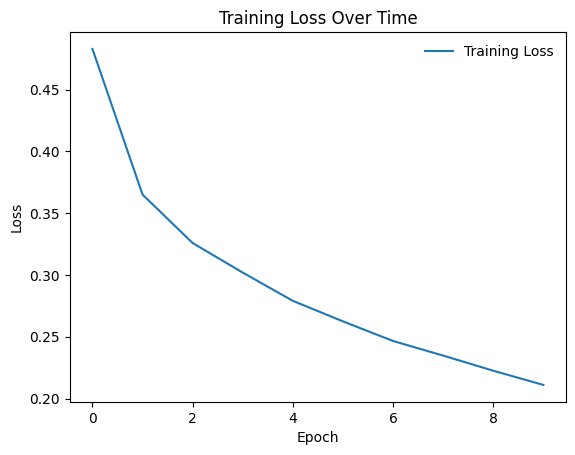

Test Accuracy: 88.66%


In [2]:
epochs = 10
train_losses = []

for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}")

# 5. 可视化loss
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(frameon=False)
plt.show()

# 6. 模型评估
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')
